<a href="https://colab.research.google.com/github/mariyam2000/project-/blob/main/Analizator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
path = r"/content/drive/My Drive/"

In [3]:
#required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
# database of microelements
df = pd.read_excel(path + 'ABBREV.xlsx')

In this database all microelements for 100g of product

In [5]:
# check info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NDB_No             8790 non-null   int64  
 1   Shrt_Desc          8790 non-null   object 
 2   Water_(g)          8789 non-null   float64
 3   Energ_Kcal         8790 non-null   int64  
 4   Protein_(g)        8790 non-null   float64
 5   Lipid_Tot_(g)      8790 non-null   float64
 6   Ash_(g)            8465 non-null   float64
 7   Carbohydrt_(g)     8790 non-null   float64
 8   Fiber_TD_(g)       8196 non-null   float64
 9   Sugar_Tot_(g)      6958 non-null   float64
 10  Calcium_(mg)       8442 non-null   float64
 11  Iron_(mg)          8646 non-null   float64
 12  Magnesium_(mg)     8051 non-null   float64
 13  Phosphorus_(mg)    8211 non-null   float64
 14  Potassium_(mg)     8364 non-null   float64
 15  Sodium_(mg)        8707 non-null   float64
 16  Zinc_(mg)          8084 

In [ ]:
# drop useless columns
af = df.drop(['NDB_No','GmWt_1','GmWt_Desc1','GmWt_2','GmWt_Desc2','Refuse_Pct'], axis = 1)
af

# Visualization

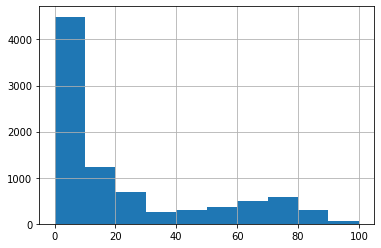

In [7]:
df['Carbohydrt_(g)'].hist()

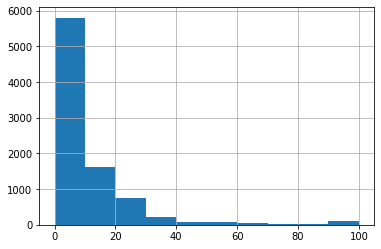

In [8]:
df['Lipid_Tot_(g)'].hist()

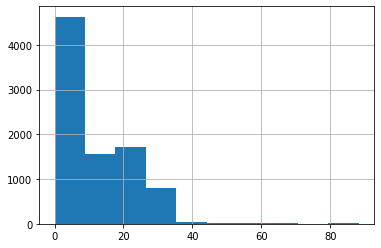

In [9]:
df['Protein_(g)'].hist()

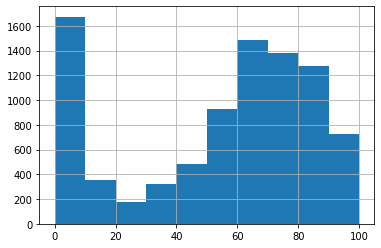

In [10]:
df['Water_(g)'].hist()

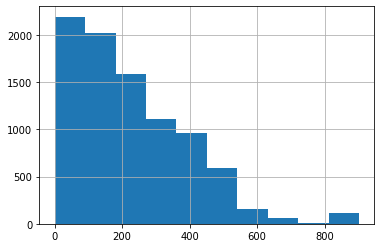

In [11]:
df.Energ_Kcal.hist()

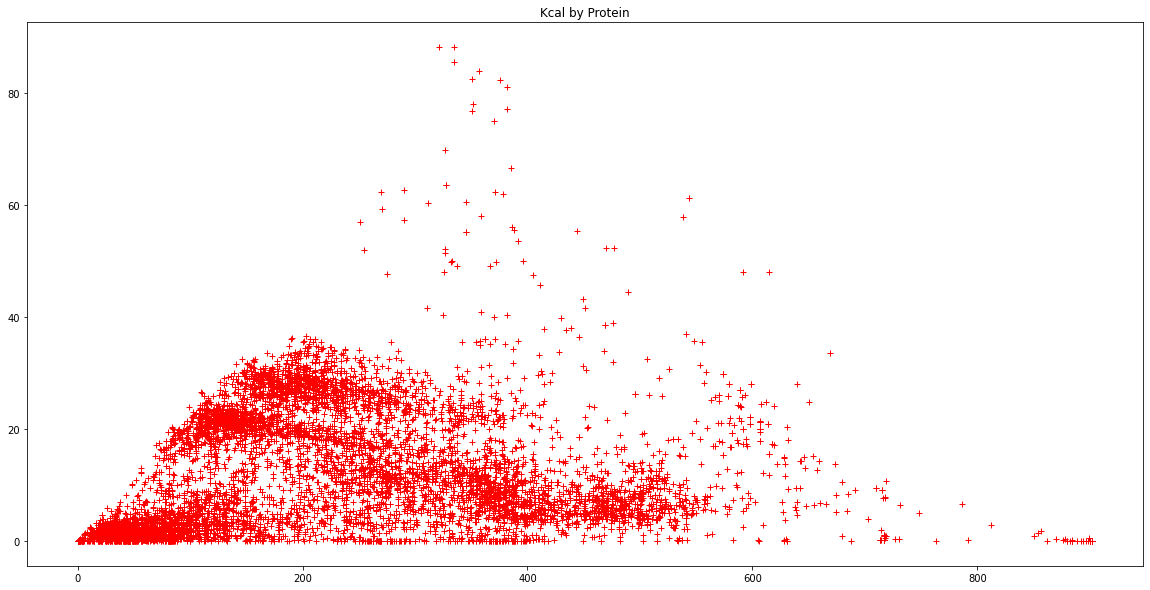

In [12]:
plt.figure(figsize=(20,10))
plt.title("Kcal by Protein")
plt.plot(df['Energ_Kcal'], df['Protein_(g)'],'r+')

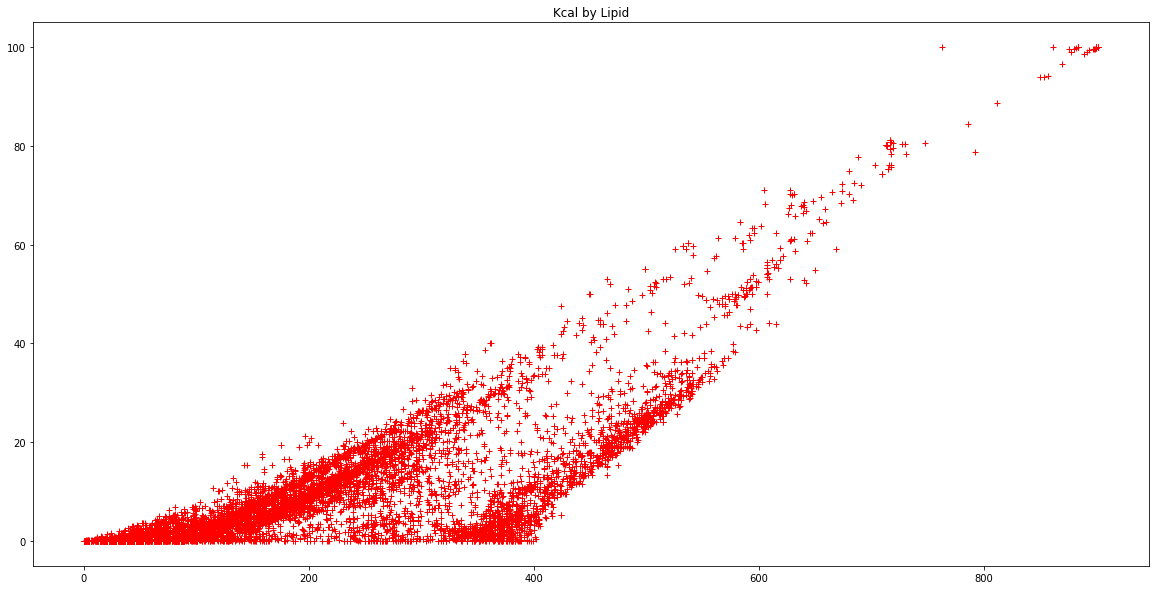

In [13]:
plt.figure(figsize=(20,10))
plt.title("Kcal by Lipid")
plt.plot(df['Energ_Kcal'], df['Lipid_Tot_(g)'],'r+')

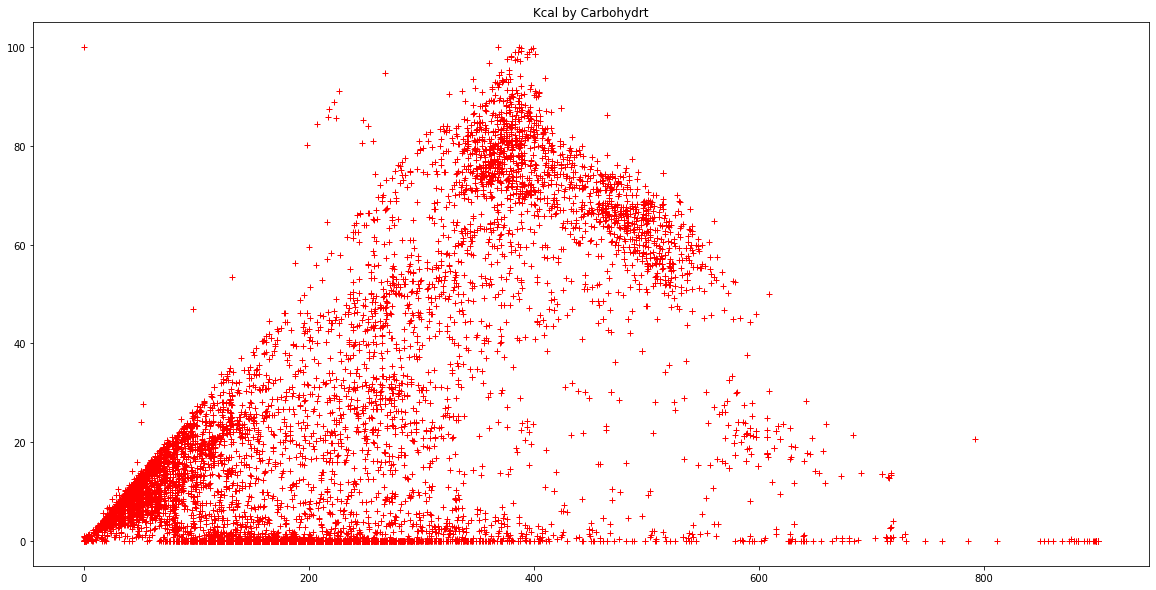

In [14]:
plt.figure(figsize=(20,10))
plt.title("Kcal by Carbohydrt")
plt.plot(df['Energ_Kcal'], df['Carbohydrt_(g)'],'r+')

# Analization

In [15]:
def user_input():    
    print('your input must be in following format: product1 132 , product2 324')
    products_and_gramms = input('enter your products and gramms:')
    return make_df(products_and_gramms)
    
    
# make dataframe from user input  
def make_df(products_and_gramms):
    user_data = []
    # split products 
    for item in products_and_gramms.split(','):
        di = {}
        # split product and gramm
        product_and_gramm = item.strip().split(' ')
        # edit user input to one format 
        di['product'] = product_and_gramm[0].upper()
        di['gramm'] = int(product_and_gramm[1])
        user_data.append(di)
        
    # create DF
    user_df = pd.DataFrame(user_data)
    return user_df

user_df = user_input()

your input must be in following format: product1 132 , product2 324
enter your products and gramms:bread 120 ,  egg 400,  cheese 560, peach 150,  tomatoes 500, parmesan 300


In [16]:
user_df

,product,gramm
0,BREAD,120
1,EGG,400
2,CHEESE,560
3,PEACH,150
4,TOMATOES,500
5,PARMESAN,300


In [17]:
# new DF for merged data
new_df = pd.DataFrame()
for j in range(len(user_df)):
    # temp DF for each product 
    temp_df = pd.DataFrame()
    for i in range(len(af)):
        try:
            if af['Shrt_Desc'].iloc[i].startswith(user_df['product'].iloc[j]):
               temp_df = pd.concat([temp_df,af.iloc[i]], axis=1)
        except:
            pass
    # our Database have a lot  of variations of one product, we take mean by each product
    new_df = pd.concat([new_df,temp_df[1:].mean(axis='columns')], axis=1)
    

In [18]:
new_df

,0,0,0,0,0,0
Water_(g),34.457262,55.625500,49.417600,73.619412,84.285000,8.600
Energ_Kcal,277.178571,231.275000,289.150000,94.058824,54.500000,370.000
Protein_(g),8.976190,21.173750,20.342300,1.092941,2.290714,40.000
Lipid_Tot_(g),5.289762,11.826250,20.434000,0.219412,1.560714,5.000
Ash_(g),2.163095,2.396500,3.895200,0.709412,1.911429,6.400
Carbohydrt_(g),49.089643,8.987500,5.936200,24.361176,9.953571,40.000
Fiber_TD_(g),4.962500,0.446154,0.089796,1.833333,2.446154,0.000
Sugar_Tot_(g),5.861714,2.908919,2.694674,16.281667,6.913333,1.500
Calcium_(mg),86.714286,93.850000,591.480000,8.764706,28.428571,800.000
Iron_(mg),2.723333,2.162250,0.438000,1.041176,1.425714,5.000


In [19]:
# add column name
new_df.columns = user_df['product'].values
j = 0
# each product elements we multiply by gramm/100
for i in new_df.columns:
    new_df[i] = new_df[i] * (user_df['gramm'].iloc[j]/100)
    j+=1
# transpose it for add gramms
new_df = new_df.transpose()
new_df['Gramm'] = user_df['gramm'].values
# transpose back easy to show
new_df = new_df.transpose()

In [20]:
# add column total were values sum by column
new_df['total'] = new_df.transpose().sum()

In [21]:
# final DF
round(new_df)

,BREAD,EGG,CHEESE,PEACH,TOMATOES,PARMESAN,total
Water_(g),41.0,223.0,277.0,110.0,421.0,26.0,1098.0
Energ_Kcal,333.0,925.0,1619.0,141.0,272.0,1110.0,4401.0
Protein_(g),11.0,85.0,114.0,2.0,11.0,120.0,342.0
Lipid_Tot_(g),6.0,47.0,114.0,0.0,8.0,15.0,191.0
Ash_(g),3.0,10.0,22.0,1.0,10.0,19.0,64.0
Carbohydrt_(g),59.0,36.0,33.0,37.0,50.0,120.0,334.0
Fiber_TD_(g),6.0,2.0,1.0,3.0,12.0,0.0,23.0
Sugar_Tot_(g),7.0,12.0,15.0,24.0,35.0,4.0,97.0
Calcium_(mg),104.0,375.0,3312.0,13.0,142.0,2400.0,6347.0
Iron_(mg),3.0,9.0,2.0,2.0,7.0,15.0,38.0


In [22]:
new_df.to_csv(path + 'microelements.csv')
